In [34]:
import pandas as pd
from matplotlib  import pyplot as plt
data = pd.read_csv('HaNoi.csv')
data.drop(['pm25', 'pm10', 'o3','no2','so2','co',], axis=1, inplace=True)
data.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
data

,index,date,AQI
0,1,1/1/2014,124
1,2,1/2/2014,186
2,3,1/3/2014,227
3,4,1/4/2014,253
4,5,1/5/2014,115
...,...,...,...
2774,2775,3/21/2024,130
2775,2776,3/22/2024,112
2776,2777,3/23/2024,76
2777,2778,3/24/2024,72


1       124.000000
2       161.200000
3       200.680000
4       232.072000
5       161.828800
           ...    
2775    110.076830
2776    111.230732
2777     90.092293
2778     79.236917
2779     75.494767
Length: 2779, dtype: float64


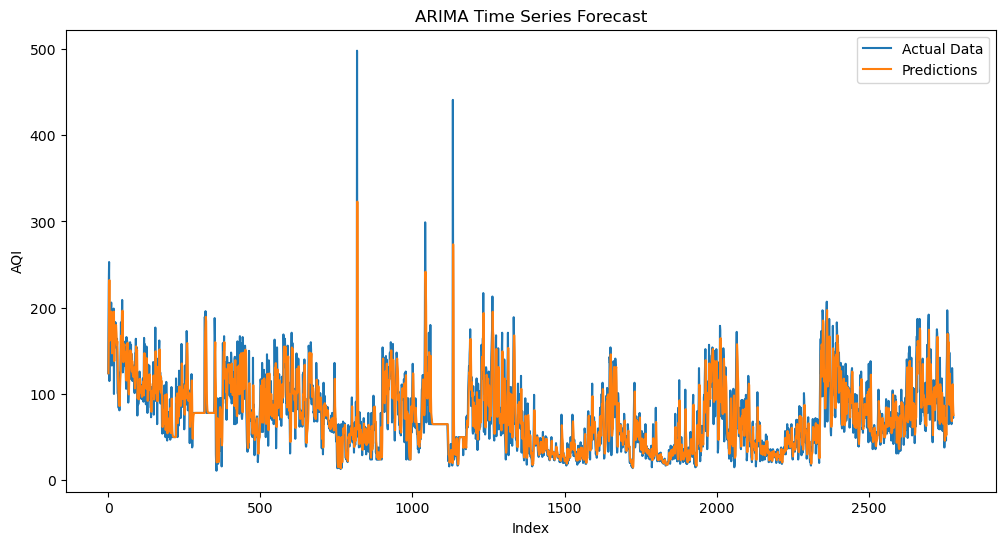

In [36]:

# Define the SES function
def ses(data, alpha):
    forecast = [data['AQI'].iloc[0]]
    for i in range(1, len(data)):
        forecast.append(alpha * data['AQI'].iloc[i] + (1 - alpha) * forecast[i-1])
    return forecast


# Set the alpha value
alpha = 0.6

# Apply SES to the data
forecast = ses(data, alpha)
index = range(1, len(data) + 1)

# Tạo Series với dữ liệu và index
forecast = pd.Series(forecast, index=index)
print(forecast)
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['AQI'], label='Actual Data')
plt.plot(forecast.index, forecast, label='Predictions')
plt.title('ARIMA Time Series Forecast')
plt.xlabel('Index')
plt.ylabel('AQI')
plt.legend()
plt.show()